In [1]:
import sys
sys.path.append('../APDFT')
sys.path.append('../Data')

In [2]:
from pyscf import gto, scf, dft, cc
import numpy as np
import pandas as pd
import pyscf
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import basis_set_exchange as bse
from FcMole import *
import os
import ast
from IPython.display import display

%load_ext autoreload
%autoreload 2
from AP_class import APDFT_perturbator as AP

## Load Dataset ##

In [3]:
data = np.load('../Data/Benzene_BNdoping_CCSD_ccpvdz.npz', allow_pickle=True)
charges, coords, elements, energies = data['charges'], data['coords'], data['elements'], data['energies']

In [4]:
columns = ['Charges', 'Elements', 'Energy']
benzene_data = pd.DataFrame(columns=columns)

# print(benzene_data)
benzene_data['Charges'] = charges.tolist()
benzene_data['Elements'] = elements.tolist()
benzene_data['Energy'] = energies.tolist()
display(benzene_data)

,Charges,Elements,Energy
0,"[7, 5, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1]","[N, B, C, C, C, C, H, H, H, H, H, H]",-231.630120
1,"[7, 6, 5, 6, 6, 6, 1, 1, 1, 1, 1, 1]","[N, C, B, C, C, C, H, H, H, H, H, H]",-231.560496
2,"[7, 6, 6, 5, 6, 6, 1, 1, 1, 1, 1, 1]","[N, C, C, B, C, C, H, H, H, H, H, H]",-231.565932
3,"[7, 7, 5, 5, 6, 6, 1, 1, 1, 1, 1, 1]","[N, N, B, B, C, C, H, H, H, H, H, H]",-234.786082
4,"[7, 7, 5, 6, 5, 6, 1, 1, 1, 1, 1, 1]","[N, N, B, C, B, C, H, H, H, H, H, H]",-234.827144
5,"[7, 7, 5, 6, 6, 5, 1, 1, 1, 1, 1, 1]","[N, N, B, C, C, B, H, H, H, H, H, H]",-234.914257
6,"[7, 7, 6, 5, 5, 6, 1, 1, 1, 1, 1, 1]","[N, N, C, B, B, C, H, H, H, H, H, H]",-234.702319
7,"[7, 5, 7, 6, 6, 5, 1, 1, 1, 1, 1, 1]","[N, B, N, C, C, B, H, H, H, H, H, H]",-235.010326
8,"[7, 5, 7, 6, 5, 6, 1, 1, 1, 1, 1, 1]","[N, B, N, C, B, C, H, H, H, H, H, H]",-234.943435
9,"[7, 6, 7, 5, 5, 6, 1, 1, 1, 1, 1, 1]","[N, C, N, B, B, C, H, H, H, H, H, H]",-234.813273


## ANM Calculation ##

In [5]:
benz_atom="""
C           -0.697371497090    -1.207738372848     0.000562326671
C            0.697247832957    -1.207809485584     0.000988816276
C            1.394619986458    -0.000071289571     0.000426160659
C            0.697371509370     1.207738369437    -0.000562929832
C           -0.697247835595     1.207809496647    -0.000988454501
C           -1.394619993964     0.000071279378    -0.000425915401
H           -1.243554579312    -2.153645128674     0.001002275318
H            1.243334519449    -2.153771487683     0.001763449199
H            2.486890298093    -0.000126523948     0.000760194696
H            1.243554588771     2.153645133125    -0.001004453155
H           -1.243334534312     2.153771514200    -0.001762175249
H           -2.486890318128     0.000126523234    -0.000759336912
"""

In [6]:
# create molecule
mol_benz=gto.M(atom=benz_atom,basis='cc-pvdz',unit='Angstrom')

hf_benz = scf.RHF(mol_benz)
hf_benz.scf()

ccsd_benz = cc.CCSD(hf_benz)
ccsd_benz.kernel()

total_energy = ccsd_benz.e_tot
print("Total energy:", total_energy)

converged SCF energy = -230.72169617905
E(CCSD) = -231.559282290112  E_corr = -0.8375861110617218
Total energy: -231.559282290112


In [7]:
C_idxs = [0, 1, 2, 3, 4, 5]
benz_ap=AP(hf_benz, sites=C_idxs)
H = benz_ap.build_hessian()
print(H)

[[-1.33768559  0.29404992  0.20427852  0.22439826  0.20427844  0.29404989]
 [ 0.29404992 -1.33768551  0.29404989  0.20427844  0.22439822  0.20427854]
 [ 0.20427852  0.29404989 -1.3376853   0.29404989  0.20427854  0.2243981 ]
 [ 0.22439826  0.20427844  0.29404989 -1.33768559  0.29404992  0.20427852]
 [ 0.20427844  0.22439822  0.20427854  0.29404992 -1.33768552  0.29404989]
 [ 0.29404989  0.20427854  0.2243981   0.20427852  0.29404989 -1.33768531]]


In [8]:
# compute the diagnalization matrix (of eigenvectors) Q

epsilon, Q = np.linalg.eig(H)
Q_inv = np.linalg.inv(Q)
print(Q)
print(Q_inv)
print(epsilon)

[[ 0.40824827 -0.40824865  0.55369237 -0.16357814  0.47605126 -0.32666274]
 [ 0.40824828  0.40824844  0.41850954  0.39772224  0.04487263  0.57560384]
 [ 0.40824832 -0.40824778 -0.13518334  0.56130136 -0.52092383 -0.2489411 ]
 [ 0.40824827  0.40824865 -0.55369237  0.16357812  0.47605127 -0.32666273]
 [ 0.40824828 -0.40824845 -0.41850953 -0.39772224  0.04487263  0.57560385]
 [ 0.40824832  0.40824779  0.13518333 -0.56130136 -0.52092384 -0.24894109]]
[[ 0.40824827  0.40824828  0.40824832  0.40824827  0.40824828  0.40824832]
 [-0.40824865  0.40824844 -0.40824778  0.40824865 -0.40824845  0.40824779]
 [ 0.55369237  0.41850954 -0.13518334 -0.55369237 -0.41850953  0.13518333]
 [-0.16357813  0.39772224  0.56130136  0.16357812 -0.39772224 -0.56130136]
 [ 0.47605126  0.04487263 -0.52092383  0.47605127  0.04487263 -0.52092384]
 [-0.32666274  0.57560384 -0.2489411  -0.32666273  0.57560385 -0.24894109]]
[-0.11663048 -1.74162646 -1.47231232 -1.47231221 -1.61161568 -1.61161567]


## Prepare Training Data ##

In [110]:
# Compute the dx value as the different between target charge and reference charge
ref_charge = [6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1]
ref_charge_array = np.tile(ref_charge, (17, 1))
target_charge_array = np.array(benzene_data['Charges'].tolist())
dx_array = (target_charge_array - ref_charge_array)[:, :6] # only take the dx for C atoms

# NEW LINE: sort the dx array
# dx_array = np.sort(dx_array, axis=1)

# Compute the c array, which represents the ANM coordinates
c_array = (Q_inv @ dx_array.T).T

# Append the data onto the dataframe
benzene_data['dx'] = dx_array.tolist()
benzene_data['c'] = c_array.tolist()
for i in range(len(c_array[0])):
    benzene_data[f"coord{i}"] = benzene_data['c'].apply(lambda x: x[i])

display(benzene_data.head())

,Charges,Elements,Energy,dx,c,coord0,coord1,coord2,coord3,coord4,coord5
0,"[7, 5, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1]","[N, B, C, C, C, C, H, H, H, H, H, H]",-231.630120,"[1, -1, 0, 0, 0, 0]","[-1.4287934946288772e-08, -0.8164970818155673,...",-1.428793e-08,-8.164971e-01,0.135183,-0.561300,4.311786e-01,-9.022666e-01
1,"[7, 6, 5, 6, 6, 6, 1, 1, 1, 1, 1, 1]","[N, C, B, C, C, C, H, H, H, H, H, H]",-231.560496,"[1, 0, -1, 0, 0, 0]","[-5.4125622817036145e-08, -8.674149645782059e-...",-5.412562e-08,-8.674150e-07,0.688876,-0.724879,9.969751e-01,-7.772164e-02
2,"[7, 6, 6, 5, 6, 6, 1, 1, 1, 1, 1, 1]","[N, C, C, B, C, C, H, H, H, H, H, H]",-231.565932,"[1, 0, 0, -1, 0, 0]","[6.21703133418805e-10, -0.8164972938465731, 1....",6.217031e-10,-8.164973e-01,1.107385,-0.327156,-1.165196e-08,-1.454588e-08
3,"[7, 7, 5, 5, 6, 6, 1, 1, 1, 1, 1, 1]","[N, N, B, B, C, C, H, H, H, H, H, H]",-234.786082,"[1, 1, -1, -1, 0, 0]","[-3.921598473732857e-08, -1.0794459702756498e-...",-3.921598e-08,-1.079446e-06,1.661078,-0.490735,5.657964e-01,8.245449e-01
4,"[7, 7, 5, 6, 5, 6, 1, 1, 1, 1, 1, 1]","[N, N, B, C, B, C, H, H, H, H, H, H]",-234.827144,"[1, 1, -1, 0, -1, 0]","[-5.216847615008291e-08, 0.8164960180907062, 1...",-5.216848e-08,8.164960e-01,1.525895,0.070565,9.969751e-01,-7.772164e-02


## Regression ##

In [86]:
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import warnings

In [111]:
columns = [f"coord{i}" for i in range(6)]
X = benzene_data[columns].multiply(10)
y = benzene_data['Energy']


In [112]:
display(X)

,coord0,coord1,coord2,coord3,coord4,coord5
0,-1.428793e-07,-8.164971e+00,1.351828e+00,-5.613004e+00,4.311786e+00,-9.022666e+00
1,-5.412562e-07,-8.674150e-06,6.888757e+00,-7.248795e+00,9.969751e+00,-7.772164e-01
2,6.217031e-09,-8.164973e+00,1.107385e+01,-3.271563e+00,-1.165196e-07,-1.454588e-07
3,-3.921598e-07,-1.079446e-05,1.661078e+01,-4.907354e+00,5.657964e+00,8.245449e+00
4,-5.216848e-07,8.164960e+00,1.525895e+01,7.056499e-01,9.969751e+00,-7.772164e-01
5,-9.263917e-07,-2.164443e-06,9.722019e+00,2.341441e+00,1.562772e+01,7.468233e+00
6,2.578850e-08,-4.083409e-06,1.944404e+01,4.682882e+00,-5.499796e-08,-1.933398e-07
7,-1.296379e-07,-1.632993e+01,-1.351838e+00,5.613023e+00,4.311786e+00,-9.022666e+00
8,2.750690e-07,-8.164964e+00,4.185090e+00,3.977232e+00,-1.346178e+00,-1.726812e+01
9,4.241654e-07,-8.164966e+00,1.390711e+01,6.318673e+00,-5.657965e+00,-8.245450e+00


### Polynomial KRR ###

In [113]:
poly_KRR = KernelRidge(kernel='polynomial', degree=1, alpha = 0.001)

k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = cross_val_score(poly_KRR, X, y, scoring='neg_mean_squared_error', cv=k_fold)
mse_scores = -mse_scores  # Convert negative MSE scores to positive

# Calculate the average error across all folds
avg_mse = mse_scores.mean()

# Print the mean squared error for each fold
print("Polynomial KRR:")
for fold, mse in enumerate(mse_scores):
    print(f"Fold {fold+1}: MSE = {mse}")

# Print the average mean squared error
print(f"Average MSE across all folds: {avg_mse}")

Polynomial KRR:
Fold 1: MSE = 3.6972241727659267
Fold 2: MSE = 98948.37699568536
Fold 3: MSE = 11.402807402938818
Fold 4: MSE = 4.823677987388417
Fold 5: MSE = 5.132237867336847
Average MSE across all folds: 19794.686588623157


### Gaussian KRR ###

In [114]:
gaussian_KRR = KernelRidge(kernel='rbf', gamma=0.5, alpha = 0.5)

k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = cross_val_score(gaussian_KRR, X, y, scoring='neg_mean_squared_error', cv=k_fold)
mse_scores = -mse_scores  # Convert negative MSE scores to positive

# Calculate the average error across all folds
avg_mse = mse_scores.mean()

# Print the mean squared error for each fold
print("Guassian KRR:")
for fold, mse in enumerate(mse_scores):
    print(f"Fold {fold+1}: MSE = {mse}")

# Print the average mean squared error
print(f"Average MSE across all folds: {avg_mse}")

Guassian KRR:
Fold 1: MSE = 54804.55965142985
Fold 2: MSE = 55558.08738135649
Fold 3: MSE = 55205.804376614135
Fold 4: MSE = 55187.724471533205
Fold 5: MSE = 55129.30005017627
Average MSE across all folds: 55177.095186221995


### Ridge Regression (non kernelized) ###

In [115]:
ridge_regression = Ridge(alpha=0.01)

k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = cross_val_score(ridge_regression, X, y, scoring='neg_mean_squared_error', cv=k_fold)
mse_scores = -mse_scores  # Convert negative MSE scores to positive

# Calculate the average error across all folds
avg_mse = mse_scores.mean()

# Print the mean squared error for each fold
for fold, mse in enumerate(mse_scores):
    print(f"Fold {fold+1}: MSE = {mse}")

# Print the average mean squared error
print(f"Average MSE across all folds: {avg_mse}")

Fold 1: MSE = 3.762605637572477
Fold 2: MSE = 1.577158818807151
Fold 3: MSE = 11.488404806735607
Fold 4: MSE = 4.81168249918128
Fold 5: MSE = 5.302886607674611
Average MSE across all folds: 5.388547673994226


## Hyperparameter Tuning ##

### Polynomial KRR ###

In [16]:
# # Hyperparam tuning
# # Grid search round 1

# param_grid = {
#     'alpha': np.logspace(np.log10(1e-5), np.log10(10), num=50),
#     'kernel': ['poly'],  
#     'degree': [2, 3, 4], 
#     'coef0': np.logspace(np.log10(1e-5), np.log10(100), num=50), 
# }

# poly_KRR = KernelRidge()

# k_fold = KFold(n_splits=5, shuffle=True, random_state=10)

# with warnings.catch_warnings():
#     warnings.filterwarnings("ignore")
#     grid_search = GridSearchCV(poly_KRR, param_grid, scoring='neg_mean_squared_error', cv=k_fold)
#     grid_search.fit(X, y)

# best_params = grid_search.best_params_
# best_score = -grid_search.best_score_

# # Print the best hyperparameters and score
# print("Best Hyperparameters:", best_params)
# print("Best Mean Squared Error:", best_score)

In [17]:
# # Hyperparam tuning
# # Grid search round 2

# param_grid = {
#     'alpha': np.logspace(np.log10(1e-7), np.log10(1e-5), num=20),
#     'kernel': ['poly'],  
#     'degree': [1, 2, 3], 
#     'coef0': np.logspace(np.log10(100), np.log10(1000), num=20), 
# }

# poly_KRR = KernelRidge()

# k_fold = KFold(n_splits=5, shuffle=True, random_state=10)

# with warnings.catch_warnings():
#     warnings.filterwarnings("ignore")
#     grid_search = GridSearchCV(poly_KRR, param_grid, scoring='neg_mean_squared_error', cv=k_fold)
#     grid_search.fit(X, y)

# best_params = grid_search.best_params_
# best_score = -grid_search.best_score_

# # Print the best hyperparameters and score
# print("Best Hyperparameters:", best_params)
# print("Best Mean Squared Error:", best_score)

In [18]:
# # Hyperparam tuning
# # Grid search round 3

# param_grid = {
#     'alpha': np.logspace(np.log10(1e-9), np.log10(1e-6), num=30),
#     'kernel': ['poly'],  
#     'degree': [1, 2, 3], 
#     'coef0': np.linspace(300, 400, num=21), 
# }

# poly_KRR = KernelRidge()

# k_fold = KFold(n_splits=5, shuffle=True, random_state=10)

# with warnings.catch_warnings():
#     warnings.filterwarnings("ignore")
#     grid_search = GridSearchCV(poly_KRR, param_grid, scoring='neg_mean_squared_error', cv=k_fold)
#     grid_search.fit(X, y)

# best_params = grid_search.best_params_
# best_score = -grid_search.best_score_

# # Print the best hyperparameters and score
# print("Best Hyperparameters:", best_params)
# print("Best Mean Squared Error:", best_score)

### Gaussian KRR ###

In [19]:
# # Grid Search Round 1

# param_grid = {
#     'alpha': [100, 10, 1, 0.1, 0.01, 0.001],  # Regularization parameter controlling the L2 regularization term
#     'gamma': [100, 10, 1, 0.1, 0.01, 0.001],  # Parameter for the Gaussian kernel, controlling the width of the kernel
#     'kernel': ['rbf'],  # Specifies the kernel function to be used, in this case, the Gaussian (RBF) kernel
# }


# gaussian_KRR = KernelRidge()

# k_fold = KFold(n_splits=5, shuffle=True, random_state=10)
# grid_search = GridSearchCV(gaussian_KRR, param_grid, scoring='neg_mean_squared_error', cv=k_fold)
# grid_search.fit(X, y)

# best_params = grid_search.best_params_
# best_score = -grid_search.best_score_

# # Print the best hyperparameters and score
# print("Best Hyperparameters:", best_params)
# print("Best Mean Squared Error:", best_score)

In [20]:
# # Grid Search round 2

# param_grid = {
#     'alpha': np.logspace(np.log10(0.001), np.log10(0.1), num=10),  # Regularization parameter controlling the L2 regularization term
#     'gamma': np.logspace(np.log10(0.0001), np.log10(0.01), num=10),  # Parameter for the Gaussian kernel, controlling the width of the kernel
#     'kernel': ['rbf'],  # Specifies the kernel function to be used, in this case, the Gaussian (RBF) kernel
# }


# gaussian_KRR = KernelRidge()

# k_fold = KFold(n_splits=5, shuffle=True, random_state=10)
# grid_search = GridSearchCV(gaussian_KRR, param_grid, scoring='neg_mean_squared_error', cv=k_fold)
# grid_search.fit(X, y)

# best_params = grid_search.best_params_
# best_score = -grid_search.best_score_

# # Print the best hyperparameters and score
# print("Best Hyperparameters:", best_params)
# print("Best Mean Squared Error:", best_score)

In [21]:
# # Grid Search round 3

# param_grid = {
#     'alpha': np.linspace(0.01, 0.02, num = 20),  # Regularization parameter controlling the L2 regularization term
#     'gamma': np.logspace(np.log10(0.00001), np.log10(0.0001), num=10),  # Parameter for the Gaussian kernel, controlling the width of the kernel
#     'kernel': ['rbf'],  # Specifies the kernel function to be used, in this case, the Gaussian (RBF) kernel
# }


# gaussian_KRR = KernelRidge()

# k_fold = KFold(n_splits=5, shuffle=True, random_state=10)
# grid_search = GridSearchCV(gaussian_KRR, param_grid, scoring='neg_mean_squared_error', cv=k_fold)
# grid_search.fit(X, y)

# best_params = grid_search.best_params_
# best_score = -grid_search.best_score_

# # Print the best hyperparameters and score
# print("Best Hyperparameters:", best_params)
# print("Best Mean Squared Error:", best_score)

In [22]:
# # Grid Search round 4

# param_grid = {
#     'alpha': np.linspace(0.005, 0.01, num = 21),  # Regularization parameter controlling the L2 regularization term
#     'gamma': np.logspace(np.log10(1e-06), np.log10(1e-05), num=10),  # Parameter for the Gaussian kernel, controlling the width of the kernel
#     'kernel': ['rbf'],  # Specifies the kernel function to be used, in this case, the Gaussian (RBF) kernel
# }


# gaussian_KRR = KernelRidge()

# k_fold = KFold(n_splits=5, shuffle=True, random_state=10)
# grid_search = GridSearchCV(gaussian_KRR, param_grid, scoring='neg_mean_squared_error', cv=k_fold)
# grid_search.fit(X, y)

# best_params = grid_search.best_params_
# best_score = -grid_search.best_score_

# # Print the best hyperparameters and score
# print("Best Hyperparameters:", best_params)
# print("Best Mean Squared Error:", best_score)

In [23]:
# # Grid Search round 5

# param_grid = {
#     'alpha': np.linspace(0.001, 0.005, num=21),  # Regularization parameter controlling the L2 regularization term
#     'gamma': np.logspace(np.log10(3e-06), np.log10(6e-05), num=20),  # Parameter for the Gaussian kernel, controlling the width of the kernel
#     'kernel': ['rbf'],  # Specifies the kernel function to be used, in this case, the Gaussian (RBF) kernel
# }


# gaussian_KRR = KernelRidge()

# k_fold = KFold(n_splits=5, shuffle=True, random_state=10)
# grid_search = GridSearchCV(gaussian_KRR, param_grid, scoring='neg_mean_squared_error', cv=k_fold)
# grid_search.fit(X, y)

# best_params = grid_search.best_params_
# best_score = -grid_search.best_score_

# # Print the best hyperparameters and score
# print("Best Hyperparameters:", best_params)
# print("Best Mean Squared Error:", best_score)

In [24]:
# # Grid Search round 6

# param_grid = {
#     'alpha': np.linspace(0.0005, 0.001, num=21),  # Regularization parameter controlling the L2 regularization term
#     'gamma': np.linspace(2e-06, 4e-06, num=20),  # Parameter for the Gaussian kernel, controlling the width of the kernel
#     'kernel': ['rbf'],  # Specifies the kernel function to be used, in this case, the Gaussian (RBF) kernel
# }


# gaussian_KRR = KernelRidge()

# k_fold = KFold(n_splits=5, shuffle=True, random_state=10)
# grid_search = GridSearchCV(gaussian_KRR, param_grid, scoring='neg_mean_squared_error', cv=k_fold)
# grid_search.fit(X, y)

# best_params = grid_search.best_params_
# best_score = -grid_search.best_score_

# # Print the best hyperparameters and score
# print("Best Hyperparameters:", best_params)
# print("Best Mean Squared Error:", best_score)

In [25]:
# # Grid Search round 7

# param_grid = {
#     'alpha': np.linspace(5e-4, 7e-4, num=21),  # Regularization parameter controlling the L2 regularization term
#     'gamma': np.linspace(1e-06, 2e-06, num=20),  # Parameter for the Gaussian kernel, controlling the width of the kernel
#     'kernel': ['rbf'],  # Specifies the kernel function to be used, in this case, the Gaussian (RBF) kernel
# }


# gaussian_KRR = KernelRidge()

# k_fold = KFold(n_splits=5, shuffle=True, random_state=10)
# grid_search = GridSearchCV(gaussian_KRR, param_grid, scoring='neg_mean_squared_error', cv=k_fold)
# grid_search.fit(X, y)

# best_params = grid_search.best_params_
# best_score = -grid_search.best_score_

# # Print the best hyperparameters and score
# print("Best Hyperparameters:", best_params)
# print("Best Mean Squared Error:", best_score)

In [26]:
# # Grid Search round 8

# param_grid = {
#     'alpha': np.linspace(3e-4, 5e-4, num=21),  # Regularization parameter controlling the L2 regularization term
#     'gamma': np.linspace(1e-06, 2e-06, num=20),  # Parameter for the Gaussian kernel, controlling the width of the kernel
#     'kernel': ['rbf'],  # Specifies the kernel function to be used, in this case, the Gaussian (RBF) kernel
# }


# gaussian_KRR = KernelRidge()

# k_fold = KFold(n_splits=5, shuffle=True, random_state=10)
# grid_search = GridSearchCV(gaussian_KRR, param_grid, scoring='neg_mean_squared_error', cv=k_fold)
# grid_search.fit(X, y)

# best_params = grid_search.best_params_
# best_score = -grid_search.best_score_

# # Print the best hyperparameters and score
# print("Best Hyperparameters:", best_params)
# print("Best Mean Squared Error:", best_score)

In [27]:
# # Grid Search round 9

# param_grid = {
#     'alpha': np.linspace(1e-4, 3e-4, num=21),  # Regularization parameter controlling the L2 regularization term
#     'gamma': np.linspace(5e-07, 1e-06, num=20),  # Parameter for the Gaussian kernel, controlling the width of the kernel
#     'kernel': ['rbf'],  # Specifies the kernel function to be used, in this case, the Gaussian (RBF) kernel
# }


# gaussian_KRR = KernelRidge()

# k_fold = KFold(n_splits=5, shuffle=True, random_state=10)
# grid_search = GridSearchCV(gaussian_KRR, param_grid, scoring='neg_mean_squared_error', cv=k_fold)
# grid_search.fit(X, y)

# best_params = grid_search.best_params_
# best_score = -grid_search.best_score_

# # Print the best hyperparameters and score
# print("Best Hyperparameters:", best_params)
# print("Best Mean Squared Error:", best_score)

In [28]:
# # Grid Search round 10

# param_grid = {
#     'alpha': np.linspace(5e-5, 1e-4, num=11),  # Regularization parameter controlling the L2 regularization term
#     'gamma': np.linspace(1e-07, 5e-07, num=21),  # Parameter for the Gaussian kernel, controlling the width of the kernel
#     'kernel': ['rbf'],  # Specifies the kernel function to be used, in this case, the Gaussian (RBF) kernel
# }


# gaussian_KRR = KernelRidge()

# k_fold = KFold(n_splits=5, shuffle=True, random_state=10)
# grid_search = GridSearchCV(gaussian_KRR, param_grid, scoring='neg_mean_squared_error', cv=k_fold)
# grid_search.fit(X, y)

# best_params = grid_search.best_params_
# best_score = -grid_search.best_score_

# # Print the best hyperparameters and score
# print("Best Hyperparameters:", best_params)
# print("Best Mean Squared Error:", best_score)

### Ridge Regression ###

In [29]:
# # Create the Ridge regression model
# # Round 1

# ridge_model = Ridge()

# # Define the hyperparameters to tune and their respective values
# param_grid = {
#     'alpha': [0.1, 0.5, 1.0, 2.0],  # Regularization strength
#     'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],  # Solver algorithm
# }

# # Perform grid search using cross-validation
# grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X, y)

# # Retrieve the best hyperparameters and the corresponding mean squared error
# best_params = grid_search.best_params_
# best_mse = -grid_search.best_score_

# # Print the best hyperparameters and the corresponding mean squared error
# print("Best Hyperparameters:")
# print(best_params)
# print("Best Mean Squared Error:", best_mse)

In [30]:
# # Create the Ridge regression model
# # Round 2

# ridge_model = Ridge()

# # Define the hyperparameters to tune and their respective values
# param_grid = {
#     'alpha': np.linspace(1.5, 2.5, num=10),  # Regularization strength
#     'solver': ['auto'],  # Solver algorithm
# }

# # Perform grid search using cross-validation
# grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X, y)

# # Retrieve the best hyperparameters and the corresponding mean squared error
# best_params = grid_search.best_params_
# best_mse = -grid_search.best_score_

# # Print the best hyperparameters and the corresponding mean squared error
# print("Best Hyperparameters:")
# print(best_params)
# print("Best Mean Squared Error:", best_mse)

In [31]:
# # Create the Ridge regression model
# # Round 3

# ridge_model = Ridge()

# # Define the hyperparameters to tune and their respective values
# param_grid = {
#     'alpha': np.linspace(2.5, 3.5, num=10),  # Regularization strength
#     'solver': ['auto'],  # Solver algorithm
# }

# # Perform grid search using cross-validation
# grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X, y)

# # Retrieve the best hyperparameters and the corresponding mean squared error
# best_params = grid_search.best_params_
# best_mse = -grid_search.best_score_

# # Print the best hyperparameters and the corresponding mean squared error
# print("Best Hyperparameters:")
# print(best_params)
# print("Best Mean Squared Error:", best_mse)

In [32]:
# # Create the Ridge regression model
# # Round 4

# ridge_model = Ridge()

# # Define the hyperparameters to tune and their respective values
# param_grid = {
#     'alpha': np.linspace(3, 10, num=71, endpoint=True),  # Regularization strength
#     'solver': ['auto'],  # Solver algorithm
# }

# # Perform grid search using cross-validation
# grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X, y)

# # Retrieve the best hyperparameters and the corresponding mean squared error
# best_params = grid_search.best_params_
# best_mse = -grid_search.best_score_

# # Print the best hyperparameters and the corresponding mean squared error
# print("Best Hyperparameters:")
# print(best_params)
# print("Best Mean Squared Error:", best_mse)

In [33]:
# # Create the Ridge regression model
# # Round 5

# ridge_model = Ridge()

# # Define the hyperparameters to tune and their respective values
# param_grid = {
#     'alpha': np.linspace(10, 20, num=101, endpoint=True),  # Regularization strength
#     'solver': ['auto'],  # Solver algorithm
# }

# # Perform grid search using cross-validation
# grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X, y)

# # Retrieve the best hyperparameters and the corresponding mean squared error
# best_params = grid_search.best_params_
# best_mse = -grid_search.best_score_

# # Print the best hyperparameters and the corresponding mean squared error
# print("Best Hyperparameters:")
# print(best_params)
# print("Best Mean Squared Error:", best_mse)

In [34]:
# # Create the Ridge regression model
# # Round 6

# ridge_model = Ridge()

# # Define the hyperparameters to tune and their respective values
# param_grid = {
#     'alpha': np.linspace(20, 100, num=41, endpoint=True),  # Regularization strength
#     'solver': ['auto'],  # Solver algorithm
# }

# # Perform grid search using cross-validation
# grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X, y)

# # Retrieve the best hyperparameters and the corresponding mean squared error
# best_params = grid_search.best_params_
# best_mse = -grid_search.best_score_

# # Print the best hyperparameters and the corresponding mean squared error
# print("Best Hyperparameters:")
# print(best_params)
# print("Best Mean Squared Error:", best_mse)

In [35]:
# # Create the Ridge regression model
# # Round 7

# ridge_model = Ridge()

# # Define the hyperparameters to tune and their respective values
# param_grid = {
#     'alpha': np.linspace(100, 1000, num=91, endpoint=True),  # Regularization strength
#     'solver': ['auto'],  # Solver algorithm
# }

# # Perform grid search using cross-validation
# grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X, y)

# # Retrieve the best hyperparameters and the corresponding mean squared error
# best_params = grid_search.best_params_
# best_mse = -grid_search.best_score_

# # Print the best hyperparameters and the corresponding mean squared error
# print("Best Hyperparameters:")
# print(best_params)
# print("Best Mean Squared Error:", best_mse)

In [36]:
# # Create the Ridge regression model
# # Round 8

# ridge_model = Ridge()

# # Define the hyperparameters to tune and their respective values
# param_grid = {
#     'alpha': np.linspace(210, 230, num=21, endpoint=True),  # Regularization strength
#     'solver': ['auto'],  # Solver algorithm
# }

# # Perform grid search using cross-validation
# grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X, y)

# # Retrieve the best hyperparameters and the corresponding mean squared error
# best_params = grid_search.best_params_
# best_mse = -grid_search.best_score_

# # Print the best hyperparameters and the corresponding mean squared error
# print("Best Hyperparameters:")
# print(best_params)
# print("Best Mean Squared Error:", best_mse)

## Model Prediction and Learning Curve ##

In [116]:
def evaluate_performance(model, X, y, num_training_sample, num_trials):

    """ 
    Given the number of training samples used, 
    calculate the average and standard deviation of MSE across a certain number of trials.
    For each trial, a specified number of training examples is used to train the model, 
    which is then evaluated on the rest of the data set.

    Args:
        X (ndarray): training data; size (N, m) where N is the number of training examples and m is the number of features
        y (ndarray): target data; size (N, 1)
        num_training_sample (int): the number of samples used for training
        num_trials: the number of trials 
    
    Returns:
        average_error: the average MSE across all trials
        std_dev_error: standard deviation of the error across all trials
    """

    errors = []
    test_size = 1.0 - num_training_sample/X.shape[0]

    for i in range(num_trials):
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=i)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        error = np.sqrt(mean_squared_error(y_val, y_pred)) # Root mean squared error
        errors.append(error)
    
    average_error = np.mean(errors)
    std_dev_error = np.std(errors)
    return average_error, std_dev_error

### Polynomial Kernel ###

In [117]:
# Polynomial kernel

best_params_poly_KRR = {'alpha': 1e-06, 'coef0': 345.0, 'degree': 2, 'kernel': 'poly'}
poly_KRR_model = KernelRidge(**best_params_poly_KRR)

columns = ['training size', 'average RMSE', 'standard deviation']
model_performance_poly_KRR = pd.DataFrame(columns=columns)

training_size = [i for i in range(1, 17)]
num_trials = 20

for num_training_sample in training_size:
    index = num_training_sample - 1
    average_error, std_dev_error = evaluate_performance(poly_KRR_model, X, y, num_training_sample, num_trials)
    model_performance_poly_KRR.at[index, 'training size'] = num_training_sample
    model_performance_poly_KRR.at[index, 'average RMSE'] = average_error
    model_performance_poly_KRR.at[index, 'standard deviation'] = std_dev_error/np.sqrt(num_trials)

display(model_performance_poly_KRR)

,training size,average RMSE,standard deviation
0,1,65.589425,3.301036
1,2,41.781464,3.052687
2,3,26.913952,2.575892
3,4,18.839379,2.001162
4,5,16.505266,1.859771
5,6,13.760096,1.905736
6,7,11.201523,2.12239
7,8,10.231176,2.205118
8,9,4.314465,1.504427
9,10,4.21547,1.617761


### Gaussian KRR ###

In [118]:
best_params_gaussian_KRR = {'alpha': 5e-05, 'gamma': 1.6e-07, 'kernel': 'rbf'}
gaussian_KRR_model = KernelRidge(**best_params_gaussian_KRR)

columns = ['training size', 'average RMSE', 'standard deviation']
model_performance_gaussian_KRR = pd.DataFrame(columns=columns)

training_size = [i for i in range(1, 17)]
num_trials = 20

for num_training_sample in training_size:
    index = num_training_sample - 1
    average_error, std_dev_error = evaluate_performance(gaussian_KRR_model, X, y, num_training_sample, num_trials)
    model_performance_gaussian_KRR.at[index, 'training size'] = num_training_sample
    model_performance_gaussian_KRR.at[index, 'average RMSE'] = average_error
    model_performance_gaussian_KRR.at[index, 'standard deviation'] = std_dev_error/np.sqrt(num_trials)

display(model_performance_gaussian_KRR)

,training size,average RMSE,standard deviation
0,1,2.717349,0.207018
1,2,2.415799,0.070882
2,3,2.415083,0.070731
3,4,2.391241,0.072856
4,5,2.401792,0.070151
5,6,2.339876,0.080843
6,7,2.113351,0.058419
7,8,2.057956,0.068488
8,9,2.054032,0.080406
9,10,1.991137,0.100892


### Ridge Regression ###

In [119]:
best_params_ridge_regression = {'alpha': 219, 'solver': 'auto'}

ridge_model = Ridge(**best_params_ridge_regression)

columns = ['training size', 'average RMSE', 'standard deviation']
model_performance_ridge_regression = pd.DataFrame(columns=columns)

training_size = [i for i in range(1, 17)]
num_trials = 20

for num_training_sample in training_size:
    index = num_training_sample - 1
    average_error, std_dev_error = evaluate_performance(ridge_model, X, y, num_training_sample, num_trials)
    model_performance_ridge_regression.at[index, 'training size'] = num_training_sample
    model_performance_ridge_regression.at[index, 'average RMSE'] = average_error
    model_performance_ridge_regression.at[index, 'standard deviation'] = std_dev_error/np.sqrt(num_trials)

display(model_performance_ridge_regression)

,training size,average RMSE,standard deviation
0,1,2.723914,0.210051
1,2,2.406446,0.069304
2,3,2.358157,0.062152
3,4,2.337675,0.067535
4,5,2.357593,0.066702
5,6,2.305314,0.073956
6,7,2.117534,0.055874
7,8,2.044925,0.067225
8,9,2.042686,0.079981
9,10,1.982066,0.104651


### Graphing ###

In [41]:
# # Graph with error bar

# graph_x = model_performance['training size']
# graph_y = model_performance['average RMSE']
# graph_error = model_performance['standard deviation']

# # Set figure size
# plt.figure(figsize=(10, 6))

# # Create line plot with error bars
# plt.errorbar(graph_x, graph_y, yerr=graph_error, marker='o', linestyle='-', capsize=4)

# # Set axis labels and title
# plt.xlabel('Training Size')
# plt.ylabel('Average RMSE')
# plt.title('Learning curve for BN-doped benzene molecule energy prediction using polynomial KRR')

# plt.xscale('log')
# plt.yscale('log')


# # Save the figure as a PNG image
# plt.savefig('[Benz] learning_curve_16_points.png', dpi=300)
# plt.show()

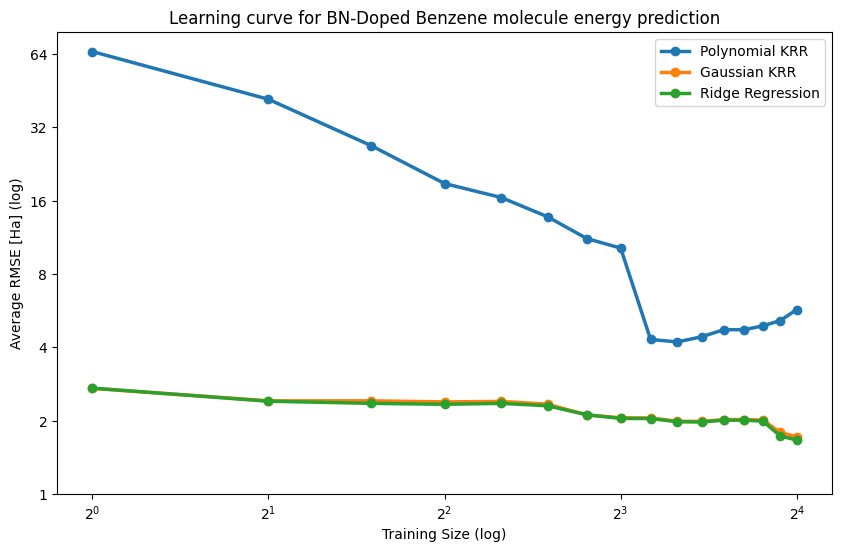

In [120]:
# No error bar
# Set figure size
plt.figure(figsize=(10, 6))

# Load the data
x = model_performance_poly_KRR['training size']
y1 = model_performance_poly_KRR['average RMSE']
y2 = model_performance_gaussian_KRR['average RMSE']
y3 = model_performance_ridge_regression['average RMSE']

# Plotting
plt.plot(x, y1, label='Polynomial KRR', marker='o', linestyle='-', linewidth=2.5)
plt.plot(x, y2, label='Gaussian KRR', marker='o', linestyle='-', linewidth=2.5)
plt.plot(x, y3, label='Ridge Regression', marker='o', linestyle='-', linewidth=2.5)


# Customize the plot
plt.title('Learning curve for BN-Doped Benzene molecule energy prediction')
plt.xlabel('Training Size (log)')
plt.ylabel('Average RMSE [Ha] (log)')
plt.legend()

# Create log scale
plt.xscale('log', base=2)
plt.yscale('log', base=2)

# yticks = [2**i for i in range(-4, 7)]
yticks = [2**i for i in range(0, 7)]
plt.yticks(yticks, labels = yticks)

# Display the plot
plt.savefig('../Graph/[Benz] learning_curve_16_points_no_err_bar.png', dpi=300)
plt.show()


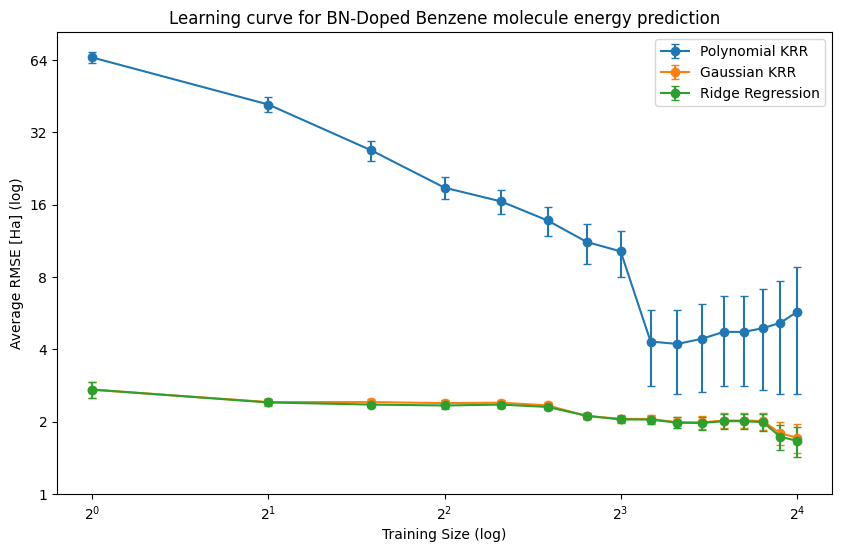

In [121]:
# With Error Bar
# Set figure size
plt.figure(figsize=(10, 6))

# Load the data
x = model_performance_poly_KRR['training size']
y1 = model_performance_poly_KRR['average RMSE']
y2 = model_performance_gaussian_KRR['average RMSE']
y3 = model_performance_ridge_regression['average RMSE']
y1_error = model_performance_poly_KRR['standard deviation']
y2_error = model_performance_gaussian_KRR['standard deviation']
y3_error = model_performance_ridge_regression['standard deviation']

# Plotting
# plt.plot(x, y1, label='Polynomial KRR', marker='o', linestyle='-', linewidth=2.5)
# plt.plot(x, y2, label='Gaussian KRR', marker='o', linestyle='-', linewidth=2.5)
# plt.plot(x, y3, label='Ridge Regression', marker='o', linestyle='-', linewidth=2.5)
plt.errorbar(x, y1, label='Polynomial KRR', yerr=y1_error, marker='o', linestyle='-', capsize=3)
plt.errorbar(x, y2, label='Gaussian KRR', yerr=y2_error, marker='o', linestyle='-', capsize=3)
plt.errorbar(x, y3, label='Ridge Regression', yerr=y3_error, marker='o', linestyle='-', capsize=3)

# Customize the plot
plt.title('Learning curve for BN-Doped Benzene molecule energy prediction')
plt.xlabel('Training Size (log)')
plt.ylabel('Average RMSE [Ha] (log)')
plt.legend()

# Create log scale
plt.xscale('log', base=2)
plt.yscale('log', base=2)

# yticks = [2**i for i in range(-4, 7)]
yticks = [2**i for i in range(0, 7)]
plt.yticks(yticks, labels = yticks)

# Display the plot
plt.savefig('../Graph/[Benz] learning_curve_16_points_with_err_bar.png', dpi=300)
plt.show()


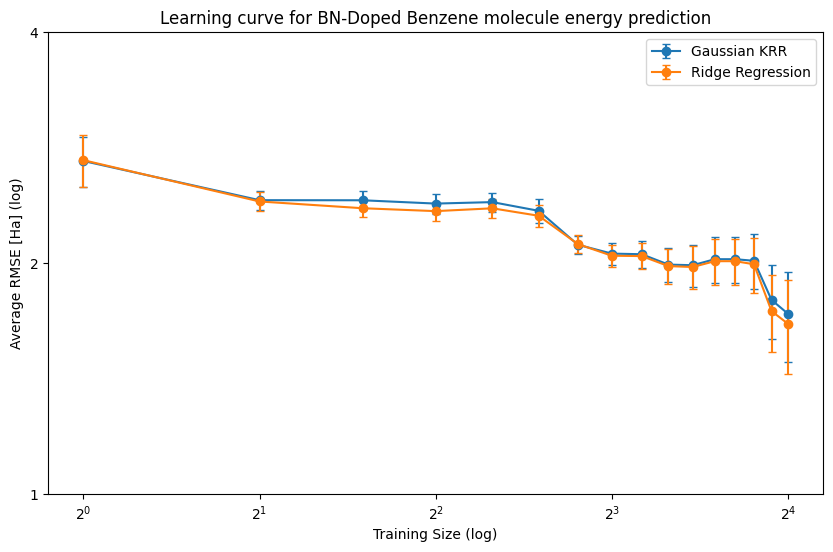

In [122]:
# Plot a version without polynomial KRR, which performed the worst

plt.figure(figsize=(10, 6))

x = model_performance_poly_KRR['training size']
y1 = model_performance_poly_KRR['average RMSE']
y2 = model_performance_gaussian_KRR['average RMSE']
y3 = model_performance_ridge_regression['average RMSE']
y2_error = model_performance_gaussian_KRR['standard deviation']
y3_error = model_performance_ridge_regression['standard deviation']

plt.errorbar(x, y2, label='Gaussian KRR', yerr=y2_error, marker='o', linestyle='-', capsize=3)
plt.errorbar(x, y3, label='Ridge Regression', yerr=y3_error, marker='o', linestyle='-', capsize=3)

# Customize the plot
plt.title('Learning curve for BN-Doped Benzene molecule energy prediction')
plt.xlabel('Training Size (log)')
plt.ylabel('Average RMSE [Ha] (log)')
plt.legend()

# Create log scale
plt.xscale('log', base=2)
plt.yscale('log', base=2)

yticks = [2**i for i in range(0, 3)]
plt.yticks(yticks, labels = yticks)

# Display the plot
plt.savefig('../Graph/[Benz] learning_curve_without_poly_KRR.png', dpi=300)
plt.show()

### Comparing to Prediction ###

In [123]:
# Create a dataframe that contains the energies predicted by the model and the actual energy

# Specifies the columns of the dataframe and create an empty dataframe
columns = ['Elements', 'Poly KRR prediction', 'Gaussian KRR prediction', 'Ridge regression prediction', 'Actual energy']
model_prediction = pd.DataFrame(columns=columns)

# fill in elements and the actual energy values from the original benzene_data dataframe
model_prediction['Elements'] = benzene_data['Elements']
model_prediction['Actual energy'] = benzene_data['Energy']

# fit the gaussian KRR and ridge regression model on the training set
gaussian_KRR_model.fit(X, y)
ridge_model.fit(X, y)
poly_KRR_model.fit(X, y)

# iterate through each row entry of the data
for index, row in model_prediction.iterrows():
    x_pred = X.loc[[index]] # extract the input to be predicted
    
    # predict energy using the two models
    # the given prediction is in a list of one element. use [0] to extract the actual value
    gaussian_prediction = gaussian_KRR_model.predict(x_pred)[0] 
    ridge_prediction = ridge_model.predict(x_pred)[0]
    poly_prediction = poly_KRR_model.predict(x_pred)[0] 
    
    # Record the prediction in the DataFrame
    model_prediction.at[index, 'Poly KRR prediction'] = poly_prediction
    model_prediction.at[index, 'Gaussian KRR prediction'] = gaussian_prediction
    model_prediction.at[index, 'Ridge regression prediction'] = ridge_prediction

# display the data
display(model_prediction)


,Elements,Poly KRR prediction,Gaussian KRR prediction,Ridge regression prediction,Actual energy
0,"[N, B, C, C, C, C, H, H, H, H, H, H]",-231.62899,-233.040987,-233.201025,-231.630120
1,"[N, C, B, C, C, C, H, H, H, H, H, H]",-231.561625,-233.146213,-233.29077,-231.560496
2,"[N, C, C, B, C, C, H, H, H, H, H, H]",-231.566497,-233.800075,-233.899023,-231.565932
3,"[N, N, B, B, C, C, H, H, H, H, H, H]",-234.785517,-233.897902,-233.988768,-234.786082
4,"[N, N, B, C, B, C, H, H, H, H, H, H]",-234.826297,-234.174274,-234.24587,-234.827144
5,"[N, N, B, C, C, B, H, H, H, H, H, H]",-234.913974,-235.717712,-235.628667,-234.914257
6,"[N, N, C, B, B, C, H, H, H, H, H, H]",-234.703448,-234.827742,-234.854123,-234.702319
7,"[N, B, N, C, C, B, H, H, H, H, H, H]",-235.010608,-235.507294,-235.449177,-235.010326
8,"[N, B, N, C, B, C, H, H, H, H, H, H]",-234.944282,-233.96342,-234.066381,-234.943435
9,"[N, C, N, B, B, C, H, H, H, H, H, H]",-234.812144,-234.722473,-234.764378,-234.813273


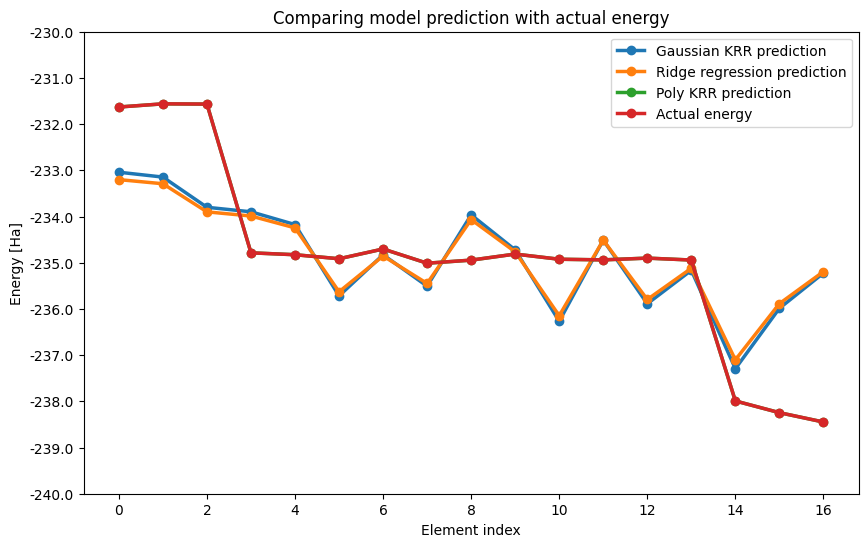

In [125]:
# Graph the results

plt.figure(figsize=(10, 6))

x = [i for i in range(17)]
y_pred_1 = model_prediction['Gaussian KRR prediction']
y_pred_2 = model_prediction['Ridge regression prediction']
y_pred_3 = model_prediction['Poly KRR prediction']
y = model_prediction['Actual energy']

plt.plot(x, y_pred_1, label='Gaussian KRR prediction', marker='o', linestyle='-', linewidth=2.5)
plt.plot(x, y_pred_2, label='Ridge regression prediction', marker='o', linestyle='-', linewidth=2.5)
plt.plot(x, y_pred_3, label='Poly KRR prediction', marker='o', linestyle='-', linewidth=2.5)
plt.plot(x, y, label='Actual energy', marker='o', linestyle='-', linewidth=2.5)

plt.title('Comparing model prediction with actual energy')
plt.xlabel('Element index')
plt.ylabel('Energy [Ha]')
plt.legend()

yticks = np.linspace(-230, -240, num=11)
plt.yticks(yticks, labels = yticks)

plt.savefig('../Graph/[Benz] comparing_model_performance.png', dpi=300)
plt.show()
